# Plot Maker For Graduate Architecture Project

In [141]:
#!/usr/bin/env python

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import results_scraper
import math

df_headers = ["testID", "Processor", "L1i", "L1d", "L2", "Kernel", "Bugs", "aobench", "aobenchv", "cyclictest", "cyclictestv", "primesieve", "primesievev", "pybench", "pybenchv", "ramspeed", "ramspeedv"]
Test = ["aobench", "cyclictest", "primesieve", "pybench", "ramspeed"]

#### Read Data from /results.csv file

In [19]:
df = pd.read_csv("dataframe_out.csv")

In [20]:
df = df.drop('Unnamed: 0',1)

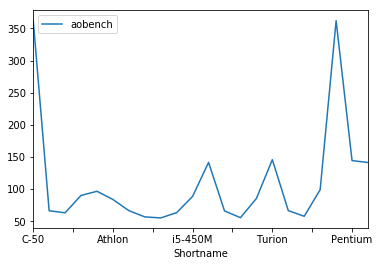

In [21]:
df.plot(x='Shortname', y='aobench')

{'C-50': 1.0019341290893016, 'i5-2520M': 1.0024114544084402, 'i7-3632QM': 1.0047520988436558, 'i5-450M': 1.0160054102795311, 'i3-2330M': 1.0257737294275955, 'Athlon': 1.0181211254172629, 'i5-7500T': 0.98354123354123357, 'i5-8250U': 0.99369710066630645, 'Pentium': 0.98060270176653974, 'i5-5200U': 0.99308790383170553, 'Turion': 0.9693394608683723}
[ 0.00193413  0.00241145  0.0047521   0.01600541  0.02577373  0.01812113
 -0.01645877 -0.0063029  -0.0193973  -0.0069121  -0.03066054] ['C-50' 'i5-2520M' 'i7-3632QM' 'i5-450M' 'i3-2330M' 'Athlon' 'i5-7500T'
 'i5-8250U' 'Pentium' 'i5-5200U' 'Turion']


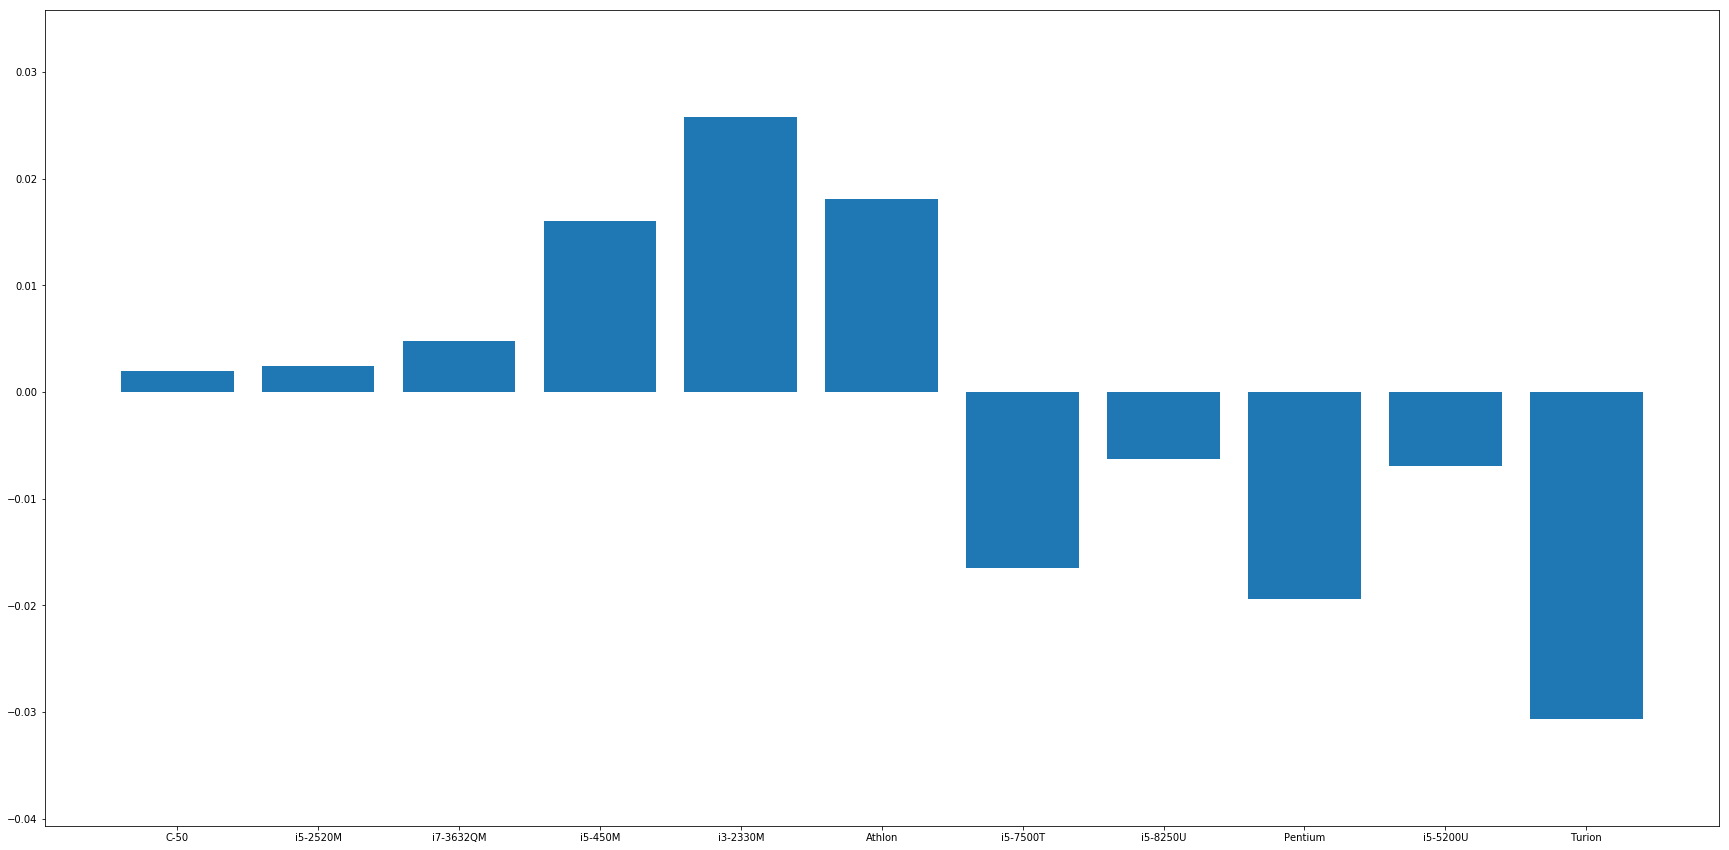

{'C-50': 1.0, 'i5-2520M': 1.0, 'i7-3632QM': 1.0, 'i5-450M': 0.8571428571428571, 'i3-2330M': 0.75, 'Athlon': 1.0, 'i5-7500T': 1.0, 'i5-8250U': 1.0, 'Pentium': 0.81818181818181823, 'i5-5200U': 0.66666666666666663, 'Turion': 0.96527777777777779}
[ 0.          0.          0.         -0.14285714 -0.25        0.          0.
  0.         -0.18181818 -0.33333333 -0.03472222] ['C-50' 'i5-2520M' 'i7-3632QM' 'i5-450M' 'i3-2330M' 'Athlon' 'i5-7500T'
 'i5-8250U' 'Pentium' 'i5-5200U' 'Turion']


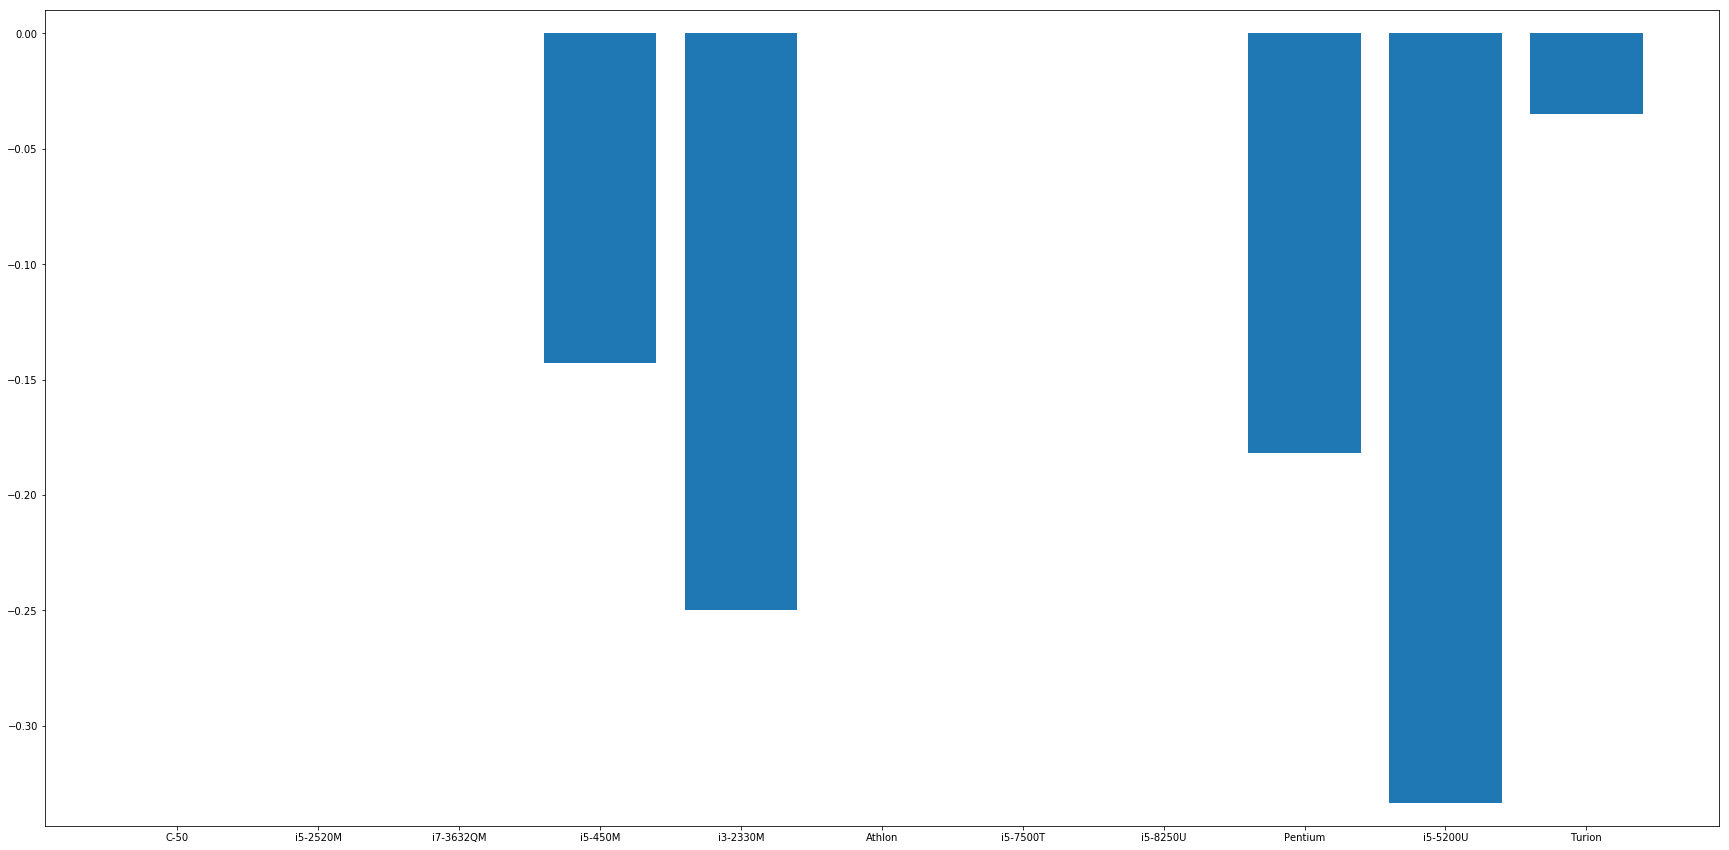

{'C-50': 0.95607127175899043, 'i5-2520M': 0.97906016113860372, 'i7-3632QM': 1.0013560635412631, 'i5-450M': 0.9995906367459344, 'i3-2330M': 0.97487523662020303, 'Athlon': 1.0111499103423172, 'i5-7500T': 1.0046814044213264, 'i5-8250U': 1.0042148492380849, 'Pentium': 1.0446119677102463, 'i5-5200U': 1.0023959269242289, 'Turion': 1.0181918717168925}
[-0.04392873 -0.02093984  0.00135606 -0.00040936 -0.02512476  0.01114991
  0.0046814   0.00421485  0.04461197  0.00239593  0.01819187] ['C-50' 'i5-2520M' 'i7-3632QM' 'i5-450M' 'i3-2330M' 'Athlon' 'i5-7500T'
 'i5-8250U' 'Pentium' 'i5-5200U' 'Turion']


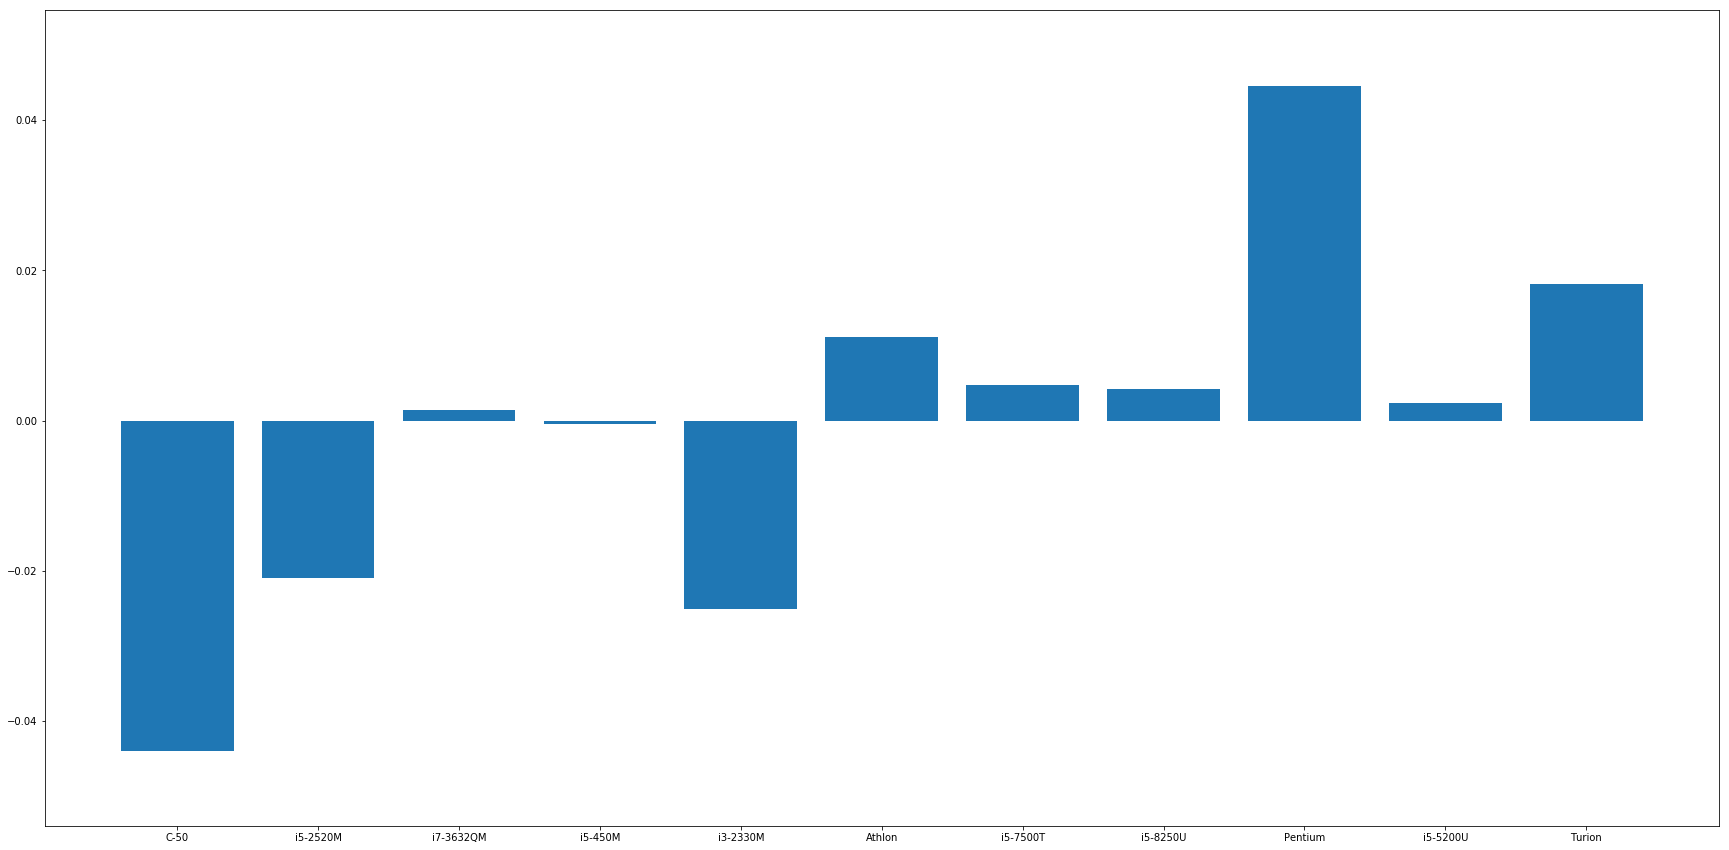

{'C-50': 1.001188872156614, 'i5-2520M': 1.0021891418563922, 'i7-3632QM': 0.99953895804518211, 'i5-450M': 0.99966865473823729, 'i3-2330M': 1.0017996400719855, 'Athlon': 0.99671996719967204, 'i5-7500T': 0.99635258358662615, 'i5-8250U': 1.003783102143758, 'Pentium': 0.99625935162094759, 'i5-5200U': 1.0013623978201636, 'Turion': 1.0014071294559099}
[ 0.00118887  0.00218914 -0.00046104 -0.00033135  0.00179964 -0.00328003
 -0.00364742  0.0037831  -0.00374065  0.0013624   0.00140713] ['C-50' 'i5-2520M' 'i7-3632QM' 'i5-450M' 'i3-2330M' 'Athlon' 'i5-7500T'
 'i5-8250U' 'Pentium' 'i5-5200U' 'Turion']


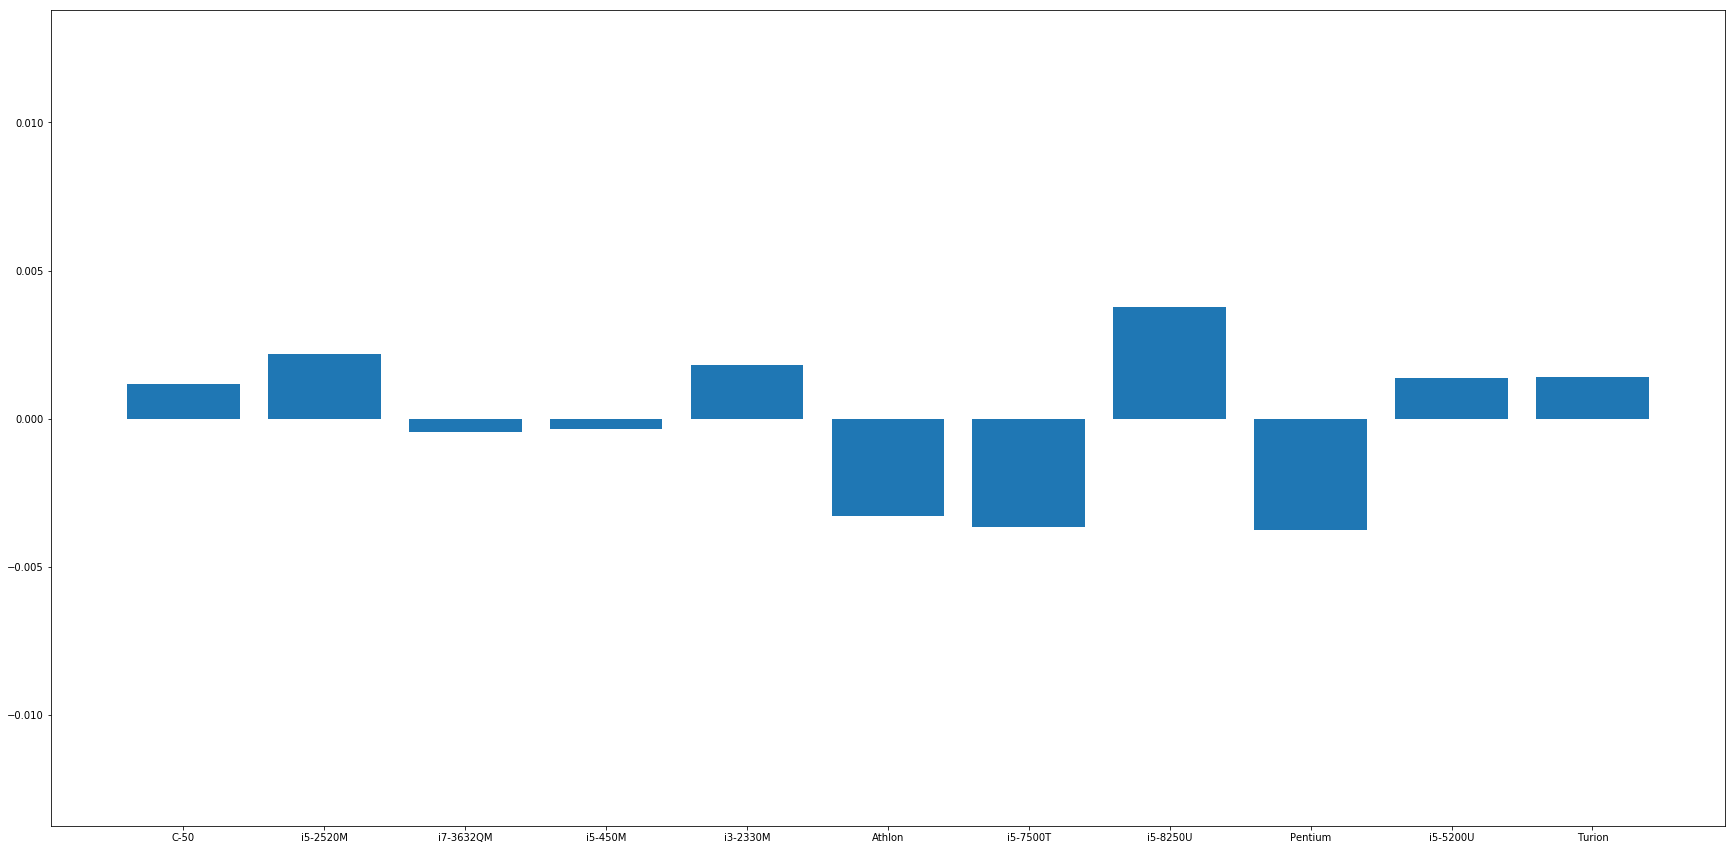

{'C-50': 1.001553249530708, 'i5-2520M': 1.001900392698335, 'i7-3632QM': 1.006164582805678, 'i5-450M': 0.99104208715440989, 'i3-2330M': 1.0014783320866065, 'Athlon': 0.990466503007986, 'i5-7500T': 0.9977402611632985, 'i5-8250U': 1.0075948862141684, 'Pentium': 1.0063617040938915, 'i5-5200U': 1.0018596457635234, 'Turion': 1.0010103657608604}
[ 0.00155325  0.00190039  0.00616458 -0.00895791  0.00147833 -0.0095335
 -0.00225974  0.00759489  0.0063617   0.00185965  0.00101037] ['C-50' 'i5-2520M' 'i7-3632QM' 'i5-450M' 'i3-2330M' 'Athlon' 'i5-7500T'
 'i5-8250U' 'Pentium' 'i5-5200U' 'Turion']


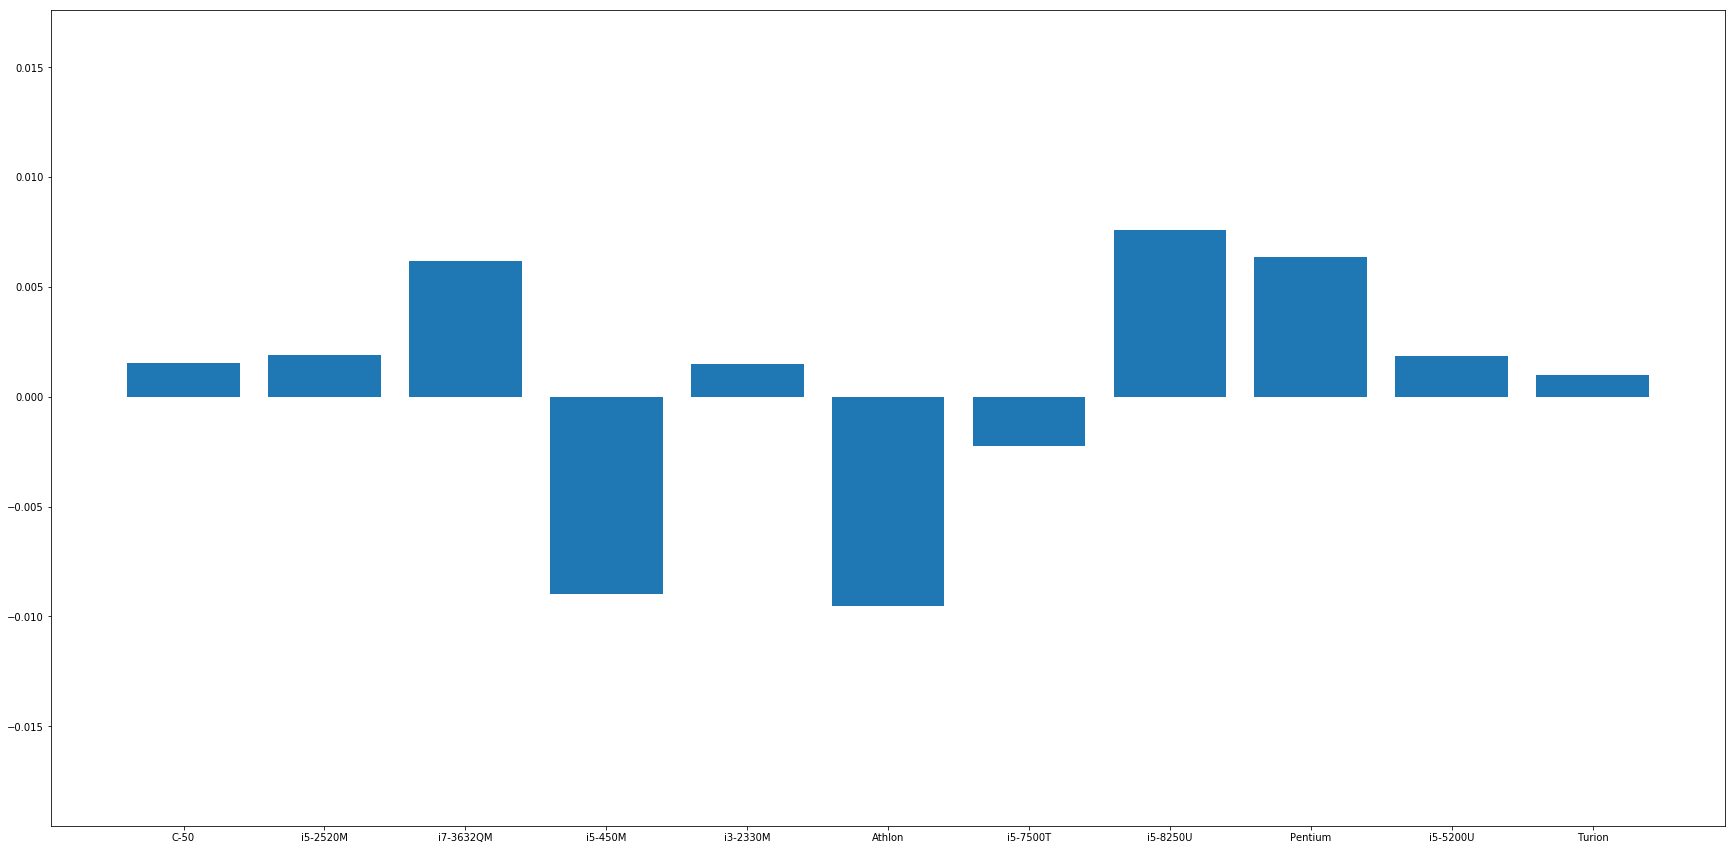

In [153]:

for test in Test:
    speedup = {}
    for proc in df.Shortname.unique():

        normal_array = np.zeros(2)

        dfTemp = pd.DataFrame()
        dfTemp = df.loc[df['Shortname'] == proc].sort_values(by=['Patched'])
        dfTemp.reset_index(drop=True)
        normal_array = dfTemp[test].tolist()
        speedup[proc] = normal_array[0]/normal_array[1]
        dfTemp.plot.bar(stacked=True);

    print (speedup)
    x, y = zip(*(speedup.items()))
    xdata, ydata = np.array(x), np.array(y)
    
    
    ydata = ydata -1
    xn = range(len(x))
    yn = range(len(y))
    print(ydata,xdata)

    plt.figure(figsize=(30,15))
    axes = plt.gca()
    axes.set_ylim([ydata.min()-0.01,ydata.max()+0.01])
    plt.bar(xn,ydata)
    plt.xticks(xn,xdata)
    plt.savefig(test+'_speedup.png', bbox_inches='tight')
    plt.show()